In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

In [ ]:
#Loading data in dataframe

df = pd.read_csv('companies.csv')
df.head()

In [ ]:
#General info about data
print(df.info())
print('\n')

#Missing values
print(df.isna().mean() * 100)
mn.matrix(df)



In [ ]:
#Understanding missing values data
df.loc[df.name.isna(),['homepage_url','status','country_code']]

In [ ]:
#Assess dtype of funding column
print(df.funding_total_usd.str.isnumeric().value_counts())
print('\n')
print(df.funding_total_usd[df.funding_total_usd.str.isalnum() == False].value_counts())

In [ ]:
#Function to clean data (handle missing values, categorical variables, ambiguity in data representation like date format etc

def clean_data(df):
  #missing values 
  #(the main features of interest are 'name','category_list','funding_total_usd','country_code','region')
  df.dropna(subset = ['name','category_list','funding_total_usd','country_code','region'])

  #Categorical Variables
  #Clean '-' values from 'funding_total_usd' column
  df = df[df.funding_total_usd != '-']
  #Updating dtype
  df.funding_total_usd = df.funding_total_usd.apply(lambda x: float(x))

  #Extracting subset of mid size companies based on valuation (eliminating very small & very big companies)
  df = df[(df.funding_total_usd > 10000000) & (df.funding_total_usd < 200000000)]

  return df

In [ ]:
clean_df = clean_data(df)
print(clean_df.shape, clean_df.info)

(12648, 14) <bound method DataFrame.info of                                    permalink  ... last_funding_at
7                       /organization/0xdata  ...      2015-11-09
21                     /organization/1000chi  ...      2010-04-01
25                  /organization/1001-menus  ...      2015-11-04
32                    /organization/1010data  ...      2010-03-08
40                /organization/10x-genomics  ...      2015-01-12
...                                      ...  ...             ...
66350  /organization/zynerba-pharmaceuticals  ...      2014-10-14
66353                 /organization/zyngenia  ...      2010-09-09
66354                  /organization/zynstra  ...      2014-07-09
66355               /organization/zyomyx-inc  ...      2014-03-26
66358         /organization/zyraz-technology  ...      2013-02-15

[12648 rows x 14 columns]>


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
clean_df.pivot_table(values = 'funding_total_usd', index = 'category_list', aggfunc= 'mean')

,funding_total_usd
category_list,
3D Printing,6500000.0
3D Printing|3D Technology|Manufacturing|Photography,31299000.0
3D Printing|3D Technology|Startups,14000000.0
3D Printing|Cloud Computing|Consulting|E-Commerce,11400000.0
3D Printing|Digital Signage|Printing,38000000.0
...,...
iPhone|Local|Location Based Services|Mobile|Social Media,12750000.0
iPhone|Mobile,6000000.0
iPhone|Mobile|Mobile Devices|Mobile Security|Wireless,38500000.0


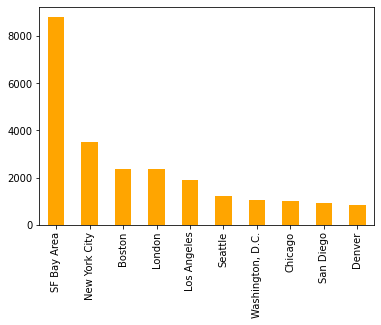

In [ ]:
df.region.value_counts()[:10].plot.bar(color ='orange')

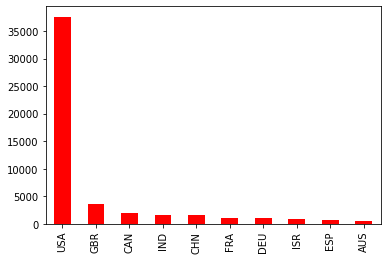

In [ ]:
df.country_code.value_counts()[:10].plot.bar(color ='red')

In [ ]:
df.nlargest(15, 'funding_total_usd')

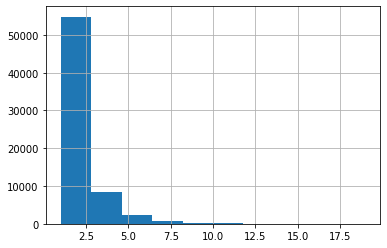

In [ ]:
df.funding_rounds.hist()